# PRCP-1012-GameWinnerPred

**Problem Statement**

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game


# Domain Anlaysis

* **Id -** Player’s Id
* **groupId -** ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
*  **matchId -** ID to identify match.
* **assists -** Number of enemy player damaged by player that were killed by teammates.
* **boosts -** Number of boost items used.
* **damageDealt -** Total damage dealt. Note: Self inflicted damage is subtracted.
* **DBNOs -** Number of enemy players knocked.
* **headshotKills -** Number of enemy players killed with headshots.
* **heals -** Number of healing items used.
* **killPlace -** Ranking in match of number of enemy players killed.
* **killPoints -** Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* **kills -** Number of enemy players killed.
* **killStreaks -** Max number of enemy players killed in a short amount of time.
* **longestKill -** Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* **matchDuration -** Duration of match in seconds.
* **matchType -** String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* **maxPlace -** Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* **numGroups -** Number of groups we have data in the match.
* **rankPoints -** Elo-like ranking of player. This ranking is inconsistent. Value of -1 takes place of “None”.
* **revives -** Number of times this player revived teammates.
* **rideDistance -** Total distance traveled in vehicles measured in meters.
* **roadKills -** Number of kills while in a vehicle.
* **swimDistance -** Total distance traveled by swimming measured in meters.
* **teamKills -** Number of times this player killed a teammate.
* **vehicleDestroys -** Number of vehicles destroyed.
* **walkDistance -** Total distance traveled on foot measured in meters.
* **weaponsAcquired -** Number of weapons picked up.
* **winPoints -** Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* **winPlacePerc -** The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Importing Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
data=pd.read_csv('pubg.csv')

In [3]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


# Basic Checks

In [4]:
data.shape

(4446966, 29)

In [5]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [8]:
data.describe() #Numerical columns

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [9]:
data.describe(include='O') #Categorical columns

,Id,groupId,matchId,matchType
count,4446966,4446966,4446966,4446966
unique,4446966,2026745,47965,16
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,squad-fpp
freq,1,74,100,1756186


In [10]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

# EDA

* **Univariate Analysis**

In [11]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Insights** 
* **Assists-** The majority of the players have less than 10 assists in their matches.
* **Boosts-** The majority of the players have consumed less than 20 boosts in their matches.
* **damageDealt-** The majority of the players have dealt less than 10,000 damage in their matches.
* **DBNOs-** The majority of the players have created less than 10 DBNOs in their matches.
* **headshotsKills-** The majority of the players have made less than 10 headshot kills in their matches.
* **heals-** The majority of the players have used less than 10 healing items in their matches
* **killPlace-** The majority of the kills made by players are in the early stages of the game, with the highest frequency around the 20-30 range.
* **killPoints-** The majority of the players earn less than 1,000 kill points in their matches.A significant number of players earn between 1,000 and 2,000 kill points.
* **kills-** The majority of the players have made less than 10 kills in their matches.
* **killStreaks-** The majority of the players have a longest kill streak of 0-3 kills.
* **longestKill-** The majority of the players have a longest kill distance of 0-100 meters.
* **matchDuration-** The majority of the matches have a duration of 1,000 to 2,000 seconds (16 minutes to 34 minutes).
* **maxPlace-** The majority of the players have achieved a highest place of 10-50. A few players have achieved a highest place of more than 80.
* **numGroups-** The majority of the data points have a 'numGroups' value between 10 and 50. A few data points have 'numGroups value more than 80.
* **rankPoints-** The majority of the players have earned a number of rank points between 0 and 2,000.
* **revives-** The majority of the players have revived their teammates between 0 and 5 times.
* **rideDistance-** The majority of the players have traveled a distance between 0 and 5,000 meter using a vehicle.
* **roadKills-** The majority of the players have made a number of road kills between 0 and 5.
* **swimDistance-** The majority of the players have traveled a distance between 0 and 5,000 meter while swimming.
* **teamKills-** The majority of the players have not killed any of their teammates.
* **vehicleDestroys-** The majority of the players have not destroy any vehicles.
* **weaponsAcquired-** The majority of the players have acquired a number of weapons between 0 and 50.
* **walkDistance-** The majority of the players have traveled a distance between 0 and 5,000 meter while walking.
* **winPoints-** The majority of the players have earned a number of win points between 0 and 200. Thre are few players have earned a umber of winpoints above 1000.

**Bivariate**

In [12]:
m_types = data.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Type","Count"]
m_types

,Type,Count
0,squad-fpp,1756186
1,duo-fpp,996691
2,squad,626526
3,solo-fpp,536762
4,duo,313591
5,solo,181943
6,normal-squad-fpp,17174
7,crashfpp,6287
8,normal-duo-fpp,5489
9,flaretpp,2505


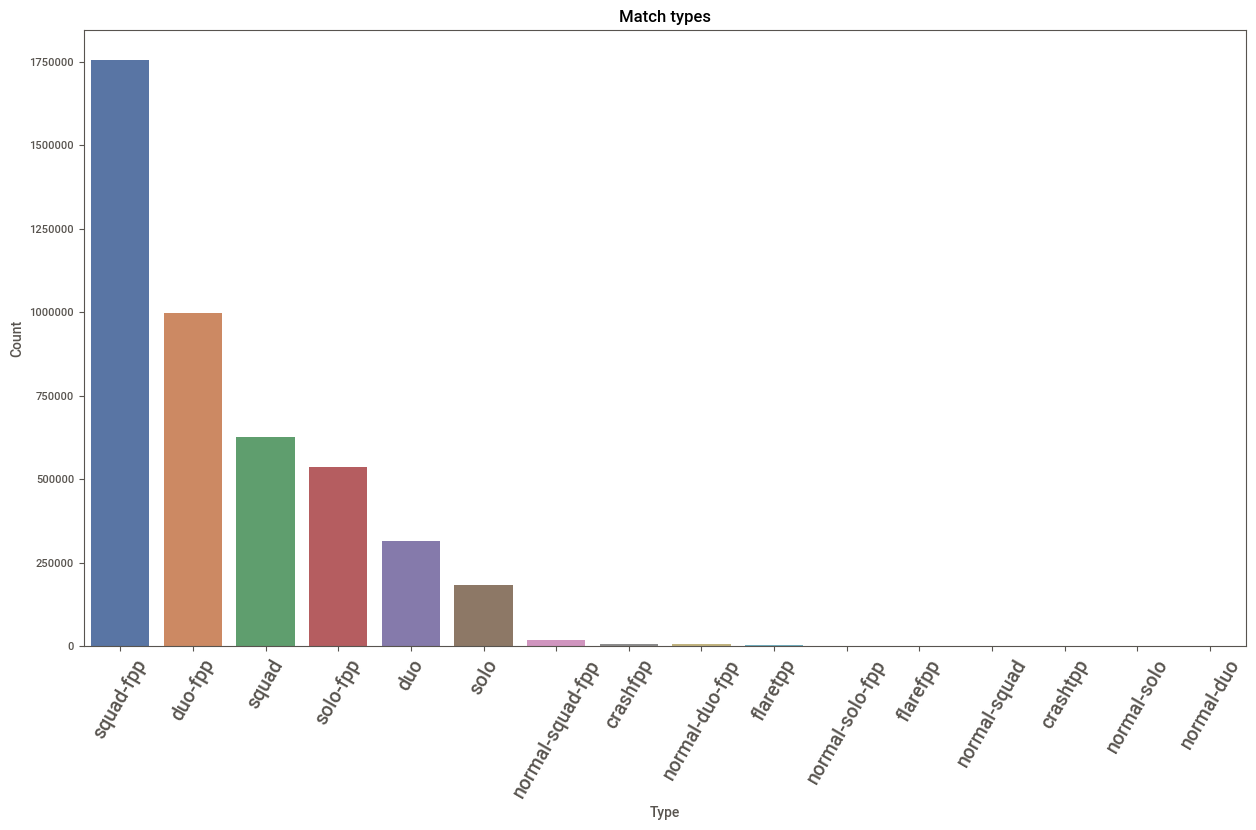

In [13]:
plt.figure(figsize=(15,8))
ticks = m_types.Type.values
ax = sns.barplot(x="Type",y='Count',  data=m_types,palette='deep')
ax.set_xticklabels(ticks, rotation=60, fontsize=14)
ax.set_title("Match types")
plt.show()

**Insights**
* Majority of players have played squad-fpp as their MatchType.
* Very less players have played solo and duo as their MatchType.

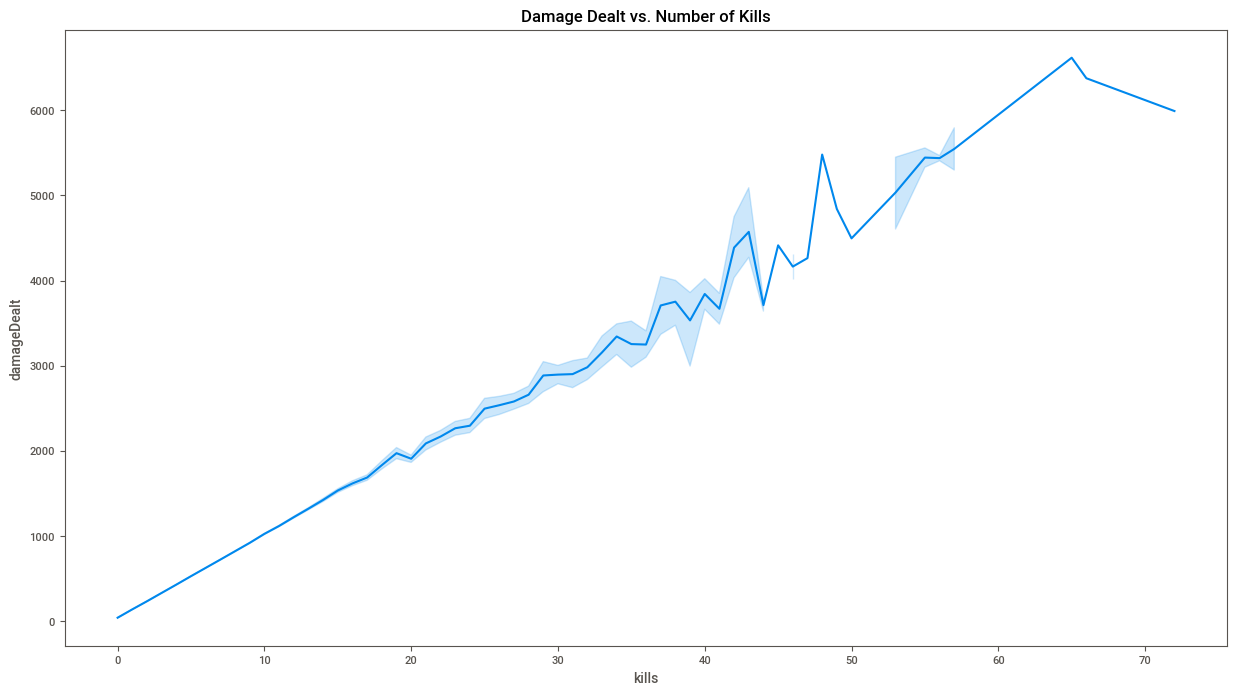

In [14]:
plt.figure(figsize=(15,8))
ax1 = sns.lineplot(x="kills",y="damageDealt", data = data)
ax1.set_title("Damage Dealt vs. Number of Kills")
plt.show()

**Insights**
* Maximum of players have their kills diectly proportional to damageDealt.
* As the number of kills increases, the damage dealt of the player also increases.

# Data Preprocessing

**Check duplicate data**

In [15]:
data.duplicated().sum()

0

**Check Null values in data**

In [16]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [17]:
# check row with null value win place perc
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [18]:
# remove that row 
data.drop(2744604, inplace = True)

In [19]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# Data Encoding

In [20]:
data.select_dtypes(include=['object']).columns

Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.matchType=lc.fit_transform(data.matchType)
data.Id=lc.fit_transform(data.Id)
data.groupId=lc.fit_transform(data.groupId)
data.matchID=lc.fit_transform(data.matchId)

In [22]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2216109,613774,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,4151025,827822,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,532102,843520,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,1216707,1340461,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,856521,1757848,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# Outliers Handling

In [23]:
data.select_dtypes(include=['int64','float64']).columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

Skipping column 'Id' as it is non-numeric.
Skipping column 'groupId' as it is non-numeric.
Skipping column 'matchId' as it is non-numeric.
Skipping column 'matchType' as it is non-numeric.


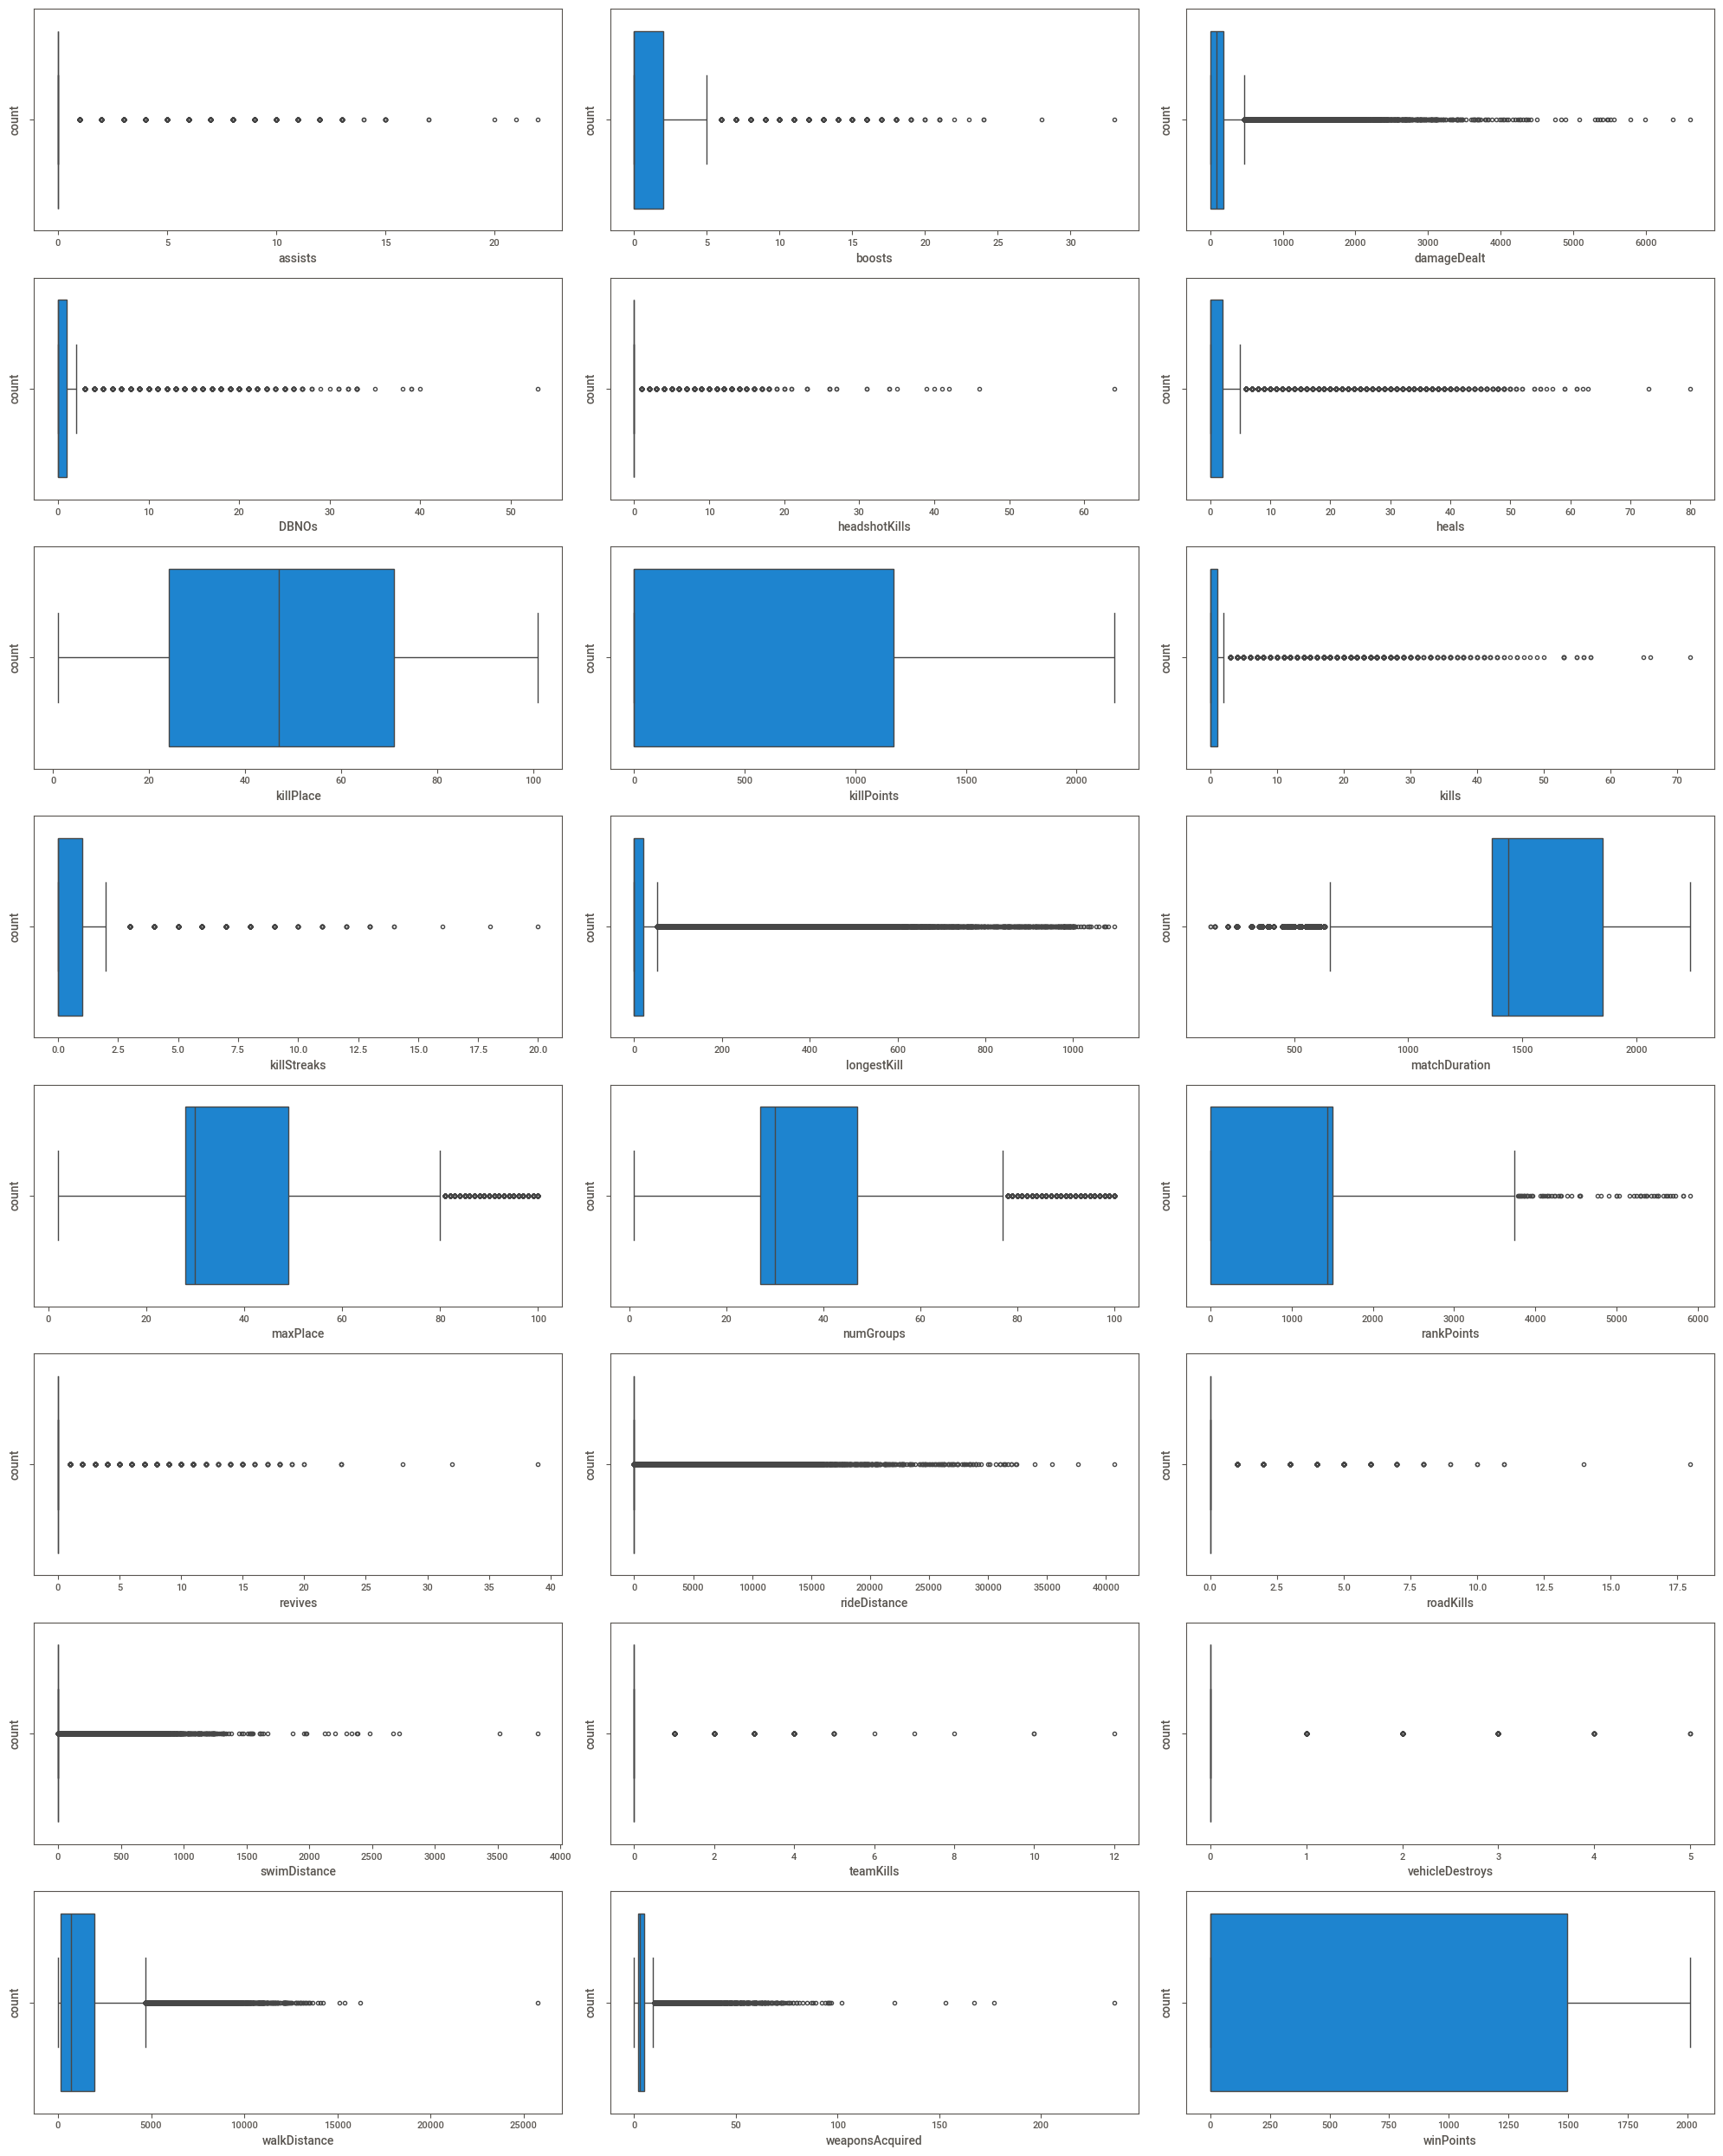

In [24]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:
    if plotnumber <= 24:
        ax = plt.subplot(8, 3, plotnumber)
        # Check if the column is numeric before plotting
        if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            sns.boxplot(x=data[column])
            plt.xlabel(column)
            plt.ylabel('count')
        else:
            print(f"Skipping column '{column}' as it is non-numeric.")
            plotnumber -= 1  # Decrement plot number to ensure correct subplot position
    plotnumber += 1

plt.tight_layout()
plt.show()

In [25]:
# 'data' is our DataFrame
columns_to_process = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc']

for column in columns_to_process:
    # Calculate Interquantile range
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)

    # Calculate lower and upper bridges
    lower_quartile = data[column].quantile(0.25) - (1.5 * IQR)
    
    upper_quartile = data[column].quantile(0.75) + (1.5 * IQR)



    # Replace values less than lower quartile with lower quartile value
    data.loc[data[column] <= lower_quartile, column] = lower_quartile
    
    # Replace values greater than upper quartile with upper quartile value
    data.loc[data[column] >= upper_quartile, column] = upper_quartile

Skipping column 'Id' as it is non-numeric.
Skipping column 'groupId' as it is non-numeric.
Skipping column 'matchId' as it is non-numeric.
Skipping column 'matchType' as it is non-numeric.


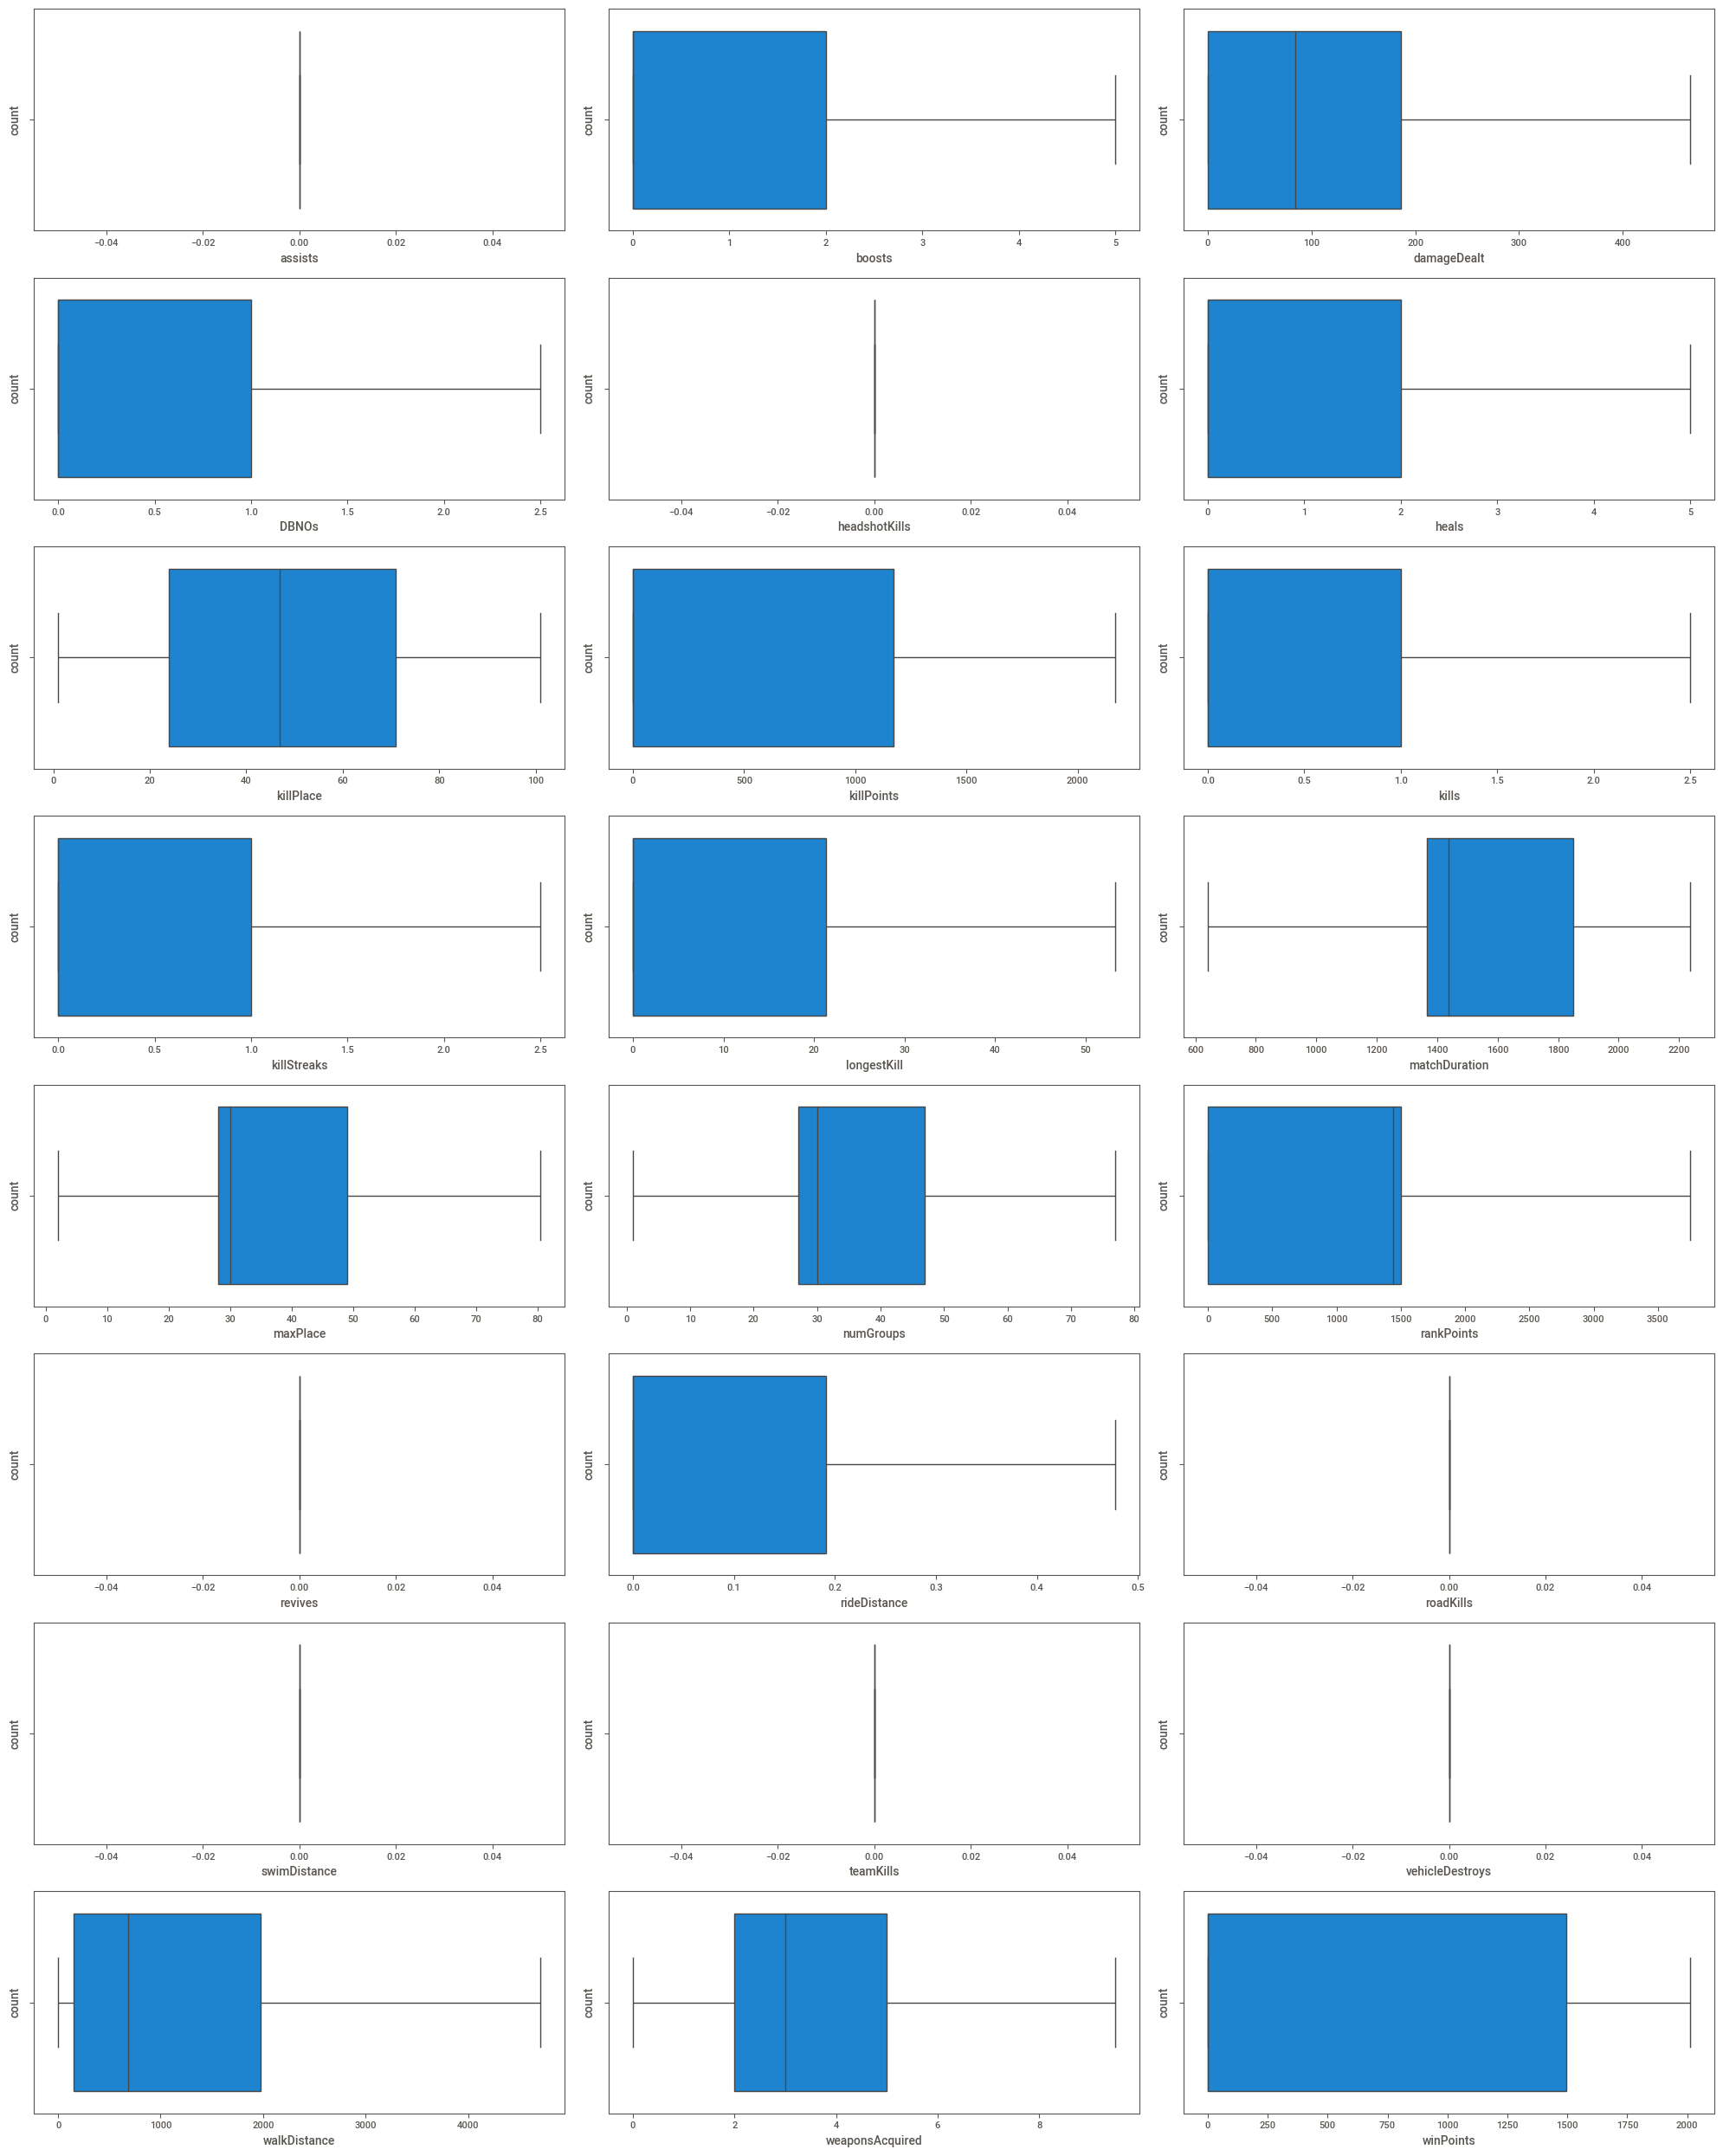

In [26]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:
    if plotnumber <= 24:
        ax = plt.subplot(8, 3, plotnumber)
        # Check if the column is numeric before plotting
        if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            sns.boxplot(x=data[column])
            plt.xlabel(column)
            plt.ylabel('count')
        else:
            print(f"Skipping column '{column}' as it is non-numeric.")
            plotnumber -= 1  # Decrement plot number to ensure correct subplot position
    plotnumber += 1

plt.tight_layout()
plt.show()

# Scaling

In [27]:
x = data.drop(['winPlacePerc','Id','groupId','matchId'], axis = 1)
y = data['winPlacePerc']

In [28]:
features=x.columns

In [29]:
features

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints'],
      dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x =scaler.fit_transform(x)

In [31]:
x

array([[ 0.        , -0.69155944, -0.90595595, ..., -0.77732786,
        -1.16973535,  1.16201066],
       [ 0.        , -0.69155944, -0.22027039, ...,  0.24486812,
         0.61869123, -0.81987285],
       [ 0.        , -0.69155944, -0.39620829, ..., -0.84867184,
        -0.72262871, -0.81987285],
       ...,
       [ 0.        , -0.69155944, -0.46322512, ..., -0.30980987,
         0.17158458, -0.81987285],
       [ 0.        ,  1.95630984,  0.4463746 , ...,  1.37433795,
         1.96001117, -0.81987285],
       [ 0.        ,  0.6323752 ,  1.10304952, ...,  0.08155057,
         0.61869123, -0.81987285]])

In [32]:
x=pd.DataFrame(x,columns=['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints'])

In [33]:
x

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0.0,-0.691559,-0.905956,-0.688617,0.0,-0.645488,0.451541,1.172889,-0.770370,-0.784072,...,-1.212350,0.0,-0.577865,0.0,0.0,0.0,0.0,-0.777328,-1.169735,1.162011
1,0.0,-0.691559,-0.220270,-0.688617,0.0,-0.645488,0.342303,-0.804784,-0.770370,-0.784072,...,0.803714,0.0,-0.556091,0.0,0.0,0.0,0.0,0.244868,0.618691,-0.819873
2,0.0,-0.691559,-0.396208,-0.688617,0.0,-0.645488,-0.021824,-0.804784,-0.770370,-0.784072,...,0.813217,0.0,-0.577865,0.0,0.0,0.0,0.0,-0.848672,-0.722629,-0.819873
3,0.0,-0.691559,-0.659328,-0.688617,0.0,-0.645488,0.997732,-0.804784,-0.770370,-0.784072,...,0.700535,0.0,-0.577865,0.0,0.0,0.0,0.0,-0.813516,-0.275522,-0.819873
4,0.0,-0.691559,-0.156327,-0.688617,0.0,-0.645488,-0.094650,-0.804784,0.312117,0.677813,...,0.906893,0.0,-0.577865,0.0,0.0,0.0,0.0,-0.944986,-0.722629,-0.819873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,0.0,-0.691559,-0.905956,-0.688617,0.0,-0.645488,0.961319,0.835043,-0.770370,-0.784072,...,-1.212350,0.0,1.732607,0.0,0.0,0.0,0.0,-0.111852,-0.275522,1.217439
4446961,0.0,-0.029592,-0.574995,-0.688617,0.0,-0.645488,0.779256,-0.804784,-0.770370,-0.784072,...,0.826794,0.0,-0.577865,0.0,0.0,0.0,0.0,-0.917523,1.065798,-0.819873
4446962,0.0,-0.691559,-0.463225,-0.688617,0.0,-0.645488,0.670017,-0.804784,-0.770370,-0.784072,...,0.825436,0.0,-0.577865,0.0,0.0,0.0,0.0,-0.309810,0.171585,-0.819873
4446963,0.0,1.956310,0.446375,0.531115,0.0,0.551537,-1.332682,-0.804784,1.394604,0.677813,...,0.714111,0.0,-0.577865,0.0,0.0,0.0,0.0,1.374338,1.960011,-0.819873


In [34]:
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4446965, dtype: float64

# Data Spliting

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 40)

In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3112875, 25) (3112875,)
(1334090, 25) (1334090,)


In [37]:
X_train

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
2996360,0.0,-0.029592,-0.306403,-0.688617,0.0,1.150050,0.997732,-0.804784,-0.770370,-0.784072,...,0.754840,0.0,-0.577865,0.0,0.0,0.0,0.0,-0.395852,-0.275522,-0.819873
540028,0.0,1.956310,-0.506254,-0.688617,0.0,2.347075,-1.187031,-0.804784,1.394604,0.677813,...,0.912324,0.0,1.732607,0.0,0.0,0.0,0.0,0.433113,1.065798,-0.819873
832807,0.0,-0.029592,1.322691,-0.688617,0.0,-0.046975,-1.077793,1.223885,1.394604,0.677813,...,-1.212350,0.0,-0.577865,0.0,0.0,0.0,0.0,-0.625528,-0.275522,1.213383
582398,0.0,-0.691559,0.782958,0.531115,0.0,-0.645488,-0.640841,-0.804784,0.312117,0.677813,...,0.798284,0.0,1.732607,0.0,0.0,0.0,0.0,0.305038,0.171585,-0.819873
4018829,0.0,-0.691559,-0.905956,-0.688617,0.0,-0.645488,1.179796,0.833450,-0.770370,-0.784072,...,-1.212350,0.0,-0.577865,0.0,0.0,0.0,0.0,-0.929076,-1.169735,1.216087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185607,0.0,2.618277,-0.435489,-0.688617,0.0,2.347075,0.160239,1.161734,-0.770370,-0.784072,...,-1.212350,0.0,1.732607,0.0,0.0,0.0,0.0,2.979148,-0.722629,1.282330
2211521,0.0,1.294343,0.961370,0.531115,0.0,0.551537,-1.004968,-0.804784,1.394604,0.677813,...,0.912324,0.0,1.732607,0.0,0.0,0.0,0.0,3.058529,0.618691,-0.819873
841010,0.0,-0.029592,0.957622,0.531115,0.0,2.347075,-0.713666,-0.804784,0.312117,0.677813,...,0.810502,0.0,-0.577865,0.0,0.0,0.0,0.0,-0.192049,-0.275522,-0.819873
3618981,0.0,-0.029592,-0.236837,-0.688617,0.0,2.347075,1.216208,1.333844,-0.770370,-0.784072,...,-1.212350,0.0,-0.577865,0.0,0.0,0.0,0.0,-0.810335,-1.169735,1.230957


In [38]:
y_train

2996361    0.2500
540028     0.7778
832807     0.5657
582398     0.5111
4018830    0.1538
            ...  
1185607    0.7500
2211521    0.6875
841010     0.6042
3618982    0.1290
2914312    0.3750
Name: winPlacePerc, Length: 3112875, dtype: float64

# Model Creation

# **1.Linear Regression**

In [39]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression() # object creation
LR.fit(X_train, y_train) # training of model

y_pred = LR.predict(X_test)
y_pred

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,f1_score

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", mse)

r2 = r2_score(y_test,y_pred)
print("R2 Score:", r2)

Mean Squared Error: 0.01389365945305765
Mean Absolute Error: 0.01389365945305765
R2 Score: 0.8529417758412345


# **2.Decision Tree Regressor**

In [55]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)  

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", mse)

r2 = r2_score(y_test,y_pred)
print("R2 Score:", r2)

Mean Squared Error: 0.014072874336783038
Mean Absolute Error: 0.014072874336783038
R2 Score: 0.851044865769952


# **3.Gradient Boosting Regressor**

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
regressor1 = GradientBoostingRegressor(n_estimators=100 )
regressor1.fit(X_train, y_train)

y_pred = regressor1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", mse)

r2 = r2_score(y_test,y_pred)
print("R2 Score:", r2)

Mean Squared Error: 0.009607335184098315
Mean Absolute Error: 0.009607335184098315
R2 Score: 0.8983106174550296


# **4.XGBRegressor**

In [65]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

y_test_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error:", mse)

r2 = r2_score(y_test,y_test_pred)
print("R2 Score:", r2)

Mean Squared Error: 0.0068262181159451304
Mean Absolute Error: 0.0068262181159451304
R2 Score: 0.9277475083333526


# **5.AdaBoostRegressor**

In [66]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(X_train,y_train)

y_test_pred = ab.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error:", mse)

r2 = r2_score(y_test,y_test_pred)
print("R2 Score:", r2)

Mean Squared Error: 0.01636004690083387
Mean Absolute Error: 0.01636004690083387
R2 Score: 0.8268361584275575


## Important Features

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

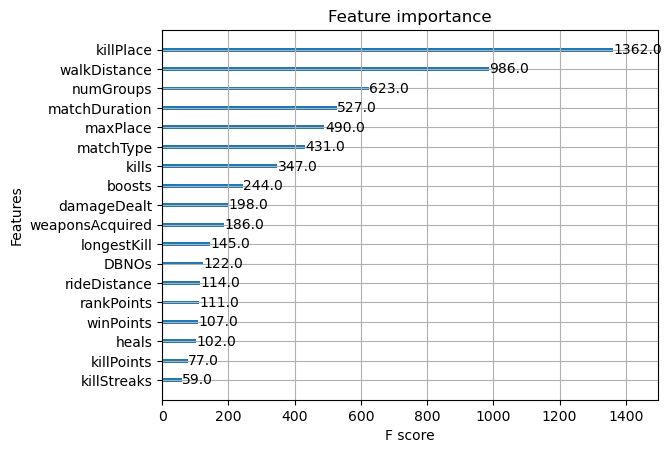

In [77]:
# Train XGBoost model
model =XGBRegressor(random_state=42) 
model.fit(X_train, y_train)

# Get importance
importance = model.feature_importances_

# Plot importance
xgb.plot_importance(model)

**Important factors affecting the win probability of the pubg game, as shown in the plot are:- walkdistance, killplace and numGroups**

# Model Comparison Report

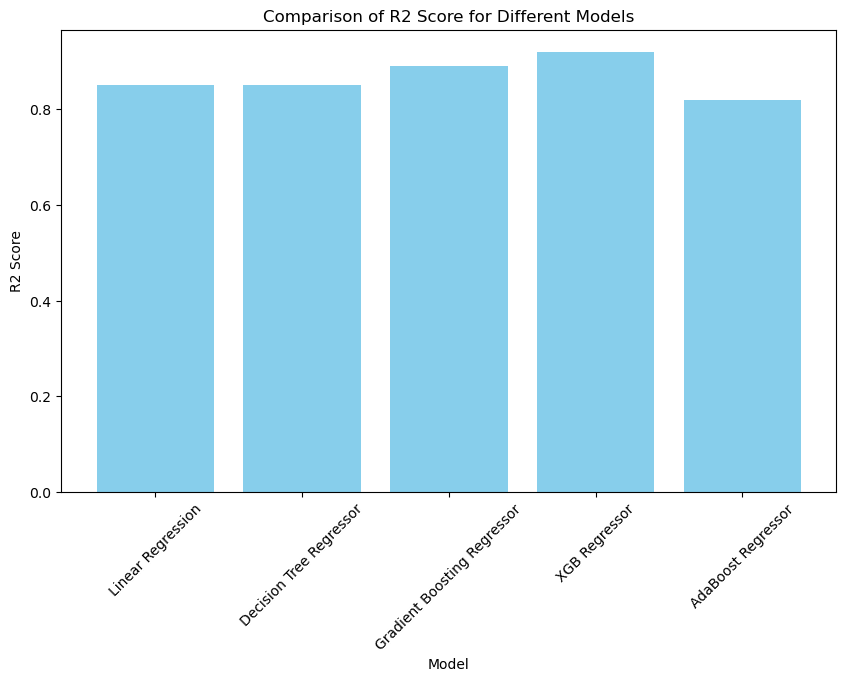

In [84]:
model_list=['Linear Regression','Decision Tree Regressor','Gradient Boosting Regressor','XGB Regressor','AdaBoost Regressor']
r2_list=[0.85,0.85,0.89,0.92,0.82]
plt.figure(figsize=(10, 6))
plt.bar(model_list, r2_list, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Score for Different Models')
plt.xticks(rotation=45)
plt.show()

In [78]:
# Create a DataFrame to store the evaluation results
evaluation_df = pd.DataFrame({'Model': model_list, 'R2 Score': r2_list})

# Print the DataFrame
print(evaluation_df)

                         Model  R2 Score
0            Linear Regression      0.85
1      Decision Tree Regressor      0.85
2  Gradient Boosting Regressor      0.89
3                XGB Regressor      0.92
4           AdaBoost Regressor      0.82


# Conclusion

* XGB Regressor performs good with the dataset.
* R2 Score of the XGB Regressor is more than compared to others.
* R2 Score of Adaboost Regressor is extremely less than compared to the other models 

In gamewinner Preduction we found XGB Regressor perform good comapared modeles